###### Universidade Federal do Rio Grande do Sul (UFRGS)   
Programa de Pós-Graduação em Engenharia Civil (PPGEC)   

# PEC00025: Introduction to Vibration Theory


### Class 06 - Numerical integration: finite differences and Duhamel techniques

[1.   Introduction](#section_1)  
[2.   The finite differences technique](#section_2)  
[2.1. Formulation](#section_21)  
[2.2. Example](#section_22)  
[3.   The Duhamel's integral technique](#section_3)  
[3.1. Formulation](#section_31)  
[3.2. Example](#section_32)  
[4.   Example: excitation recorded as file](#section_4)  
[5.   Finite differences for nonlinear equations](#section_5)  
[6.   Assignment](#section_6)  

---
_Prof. Marcelo M. Rocha, Dr.techn._ [(ORCID)](https://orcid.org/0000-0001-5640-1020)  
_Porto Alegre, RS, Brazil_ 


In [1]:
# Importing Python modules required for this notebook
# (this cell must be executed with "shift+enter" before any other Python cell)

import numpy as np
import matplotlib.pyplot as plt
from   MRPy import MRPy


## 1. Introduction <a name="section_1"></a> 

Besides the basic conceptual solutions presented in the previous class, in practical cases
where the external force $F(t)$ is arbitrarily defined, the dynamic equilibrium equation must 
be numerically solved. 

In this class we present two of the most important integration techniques:  
* the central finite differences scheme and  
* the Duhamel integral method.   

There is also another useful technique that will be presented after we introduce the
Fourier transform and the frequency domain analysis of linear systems, in the next classes.
For the moment we can state that time domain techniques are mainly used for transient loads,
while frequency domain techniques are maily used for periodic or stationary random loads.


## 2. The finite differences technique <a name="section_2"></a> 

### 2.1. Formulation  <a name="section_21"></a> 

Although the central finite differences technique may be used to solve the dynamic 
equilibrium equation of linear systems, its most important application is in the 
solution of _nonlinear systems_. 
For linear systems it allows the integration scheme to be _explicit_, what means that the system
state (displacement) in future can be _explicitly_ stated as a function of system state in the past.
To understand this concept, let us discretize the time domain as $t_i = i \Delta t$, where $\Delta t$
is the so-called _time step_. 
This is depicted in the figure below:

<img src="images/finite_differences.jpg" alt="SDOF system" width="480px"/>

Consequently, both the sistem response, $u(t)$, as well as the external load, $F(t)$, can be 
now expressed at the discrete time instants, $t_i$, as:

\begin{align*}
 u_i &= u(t_i) \\
 F_i &= F(t_i)
\end{align*}

From this definitions, the system velocity, $\dot{u}(t)$, and acceleration, $\ddot{u}(t)$, can be
approximated through a central finite differences scheme as:

\begin{align*}
\dot{ u}_i &= \frac{1}{2\Delta t}   \left( u_{i+1} - u_{i-1}           \right) \\
\ddot{u}_i &= \frac{1}{ \Delta t^2} \left( u_{i+1} - 2u_ {i} + u_{i-1} \right) 
\end{align*}

Considering that the dynamic equilibrium equation holds also for a generic time instant $t_i$:

$$ \ddot{u}_i + 2 \zeta \omega_{\rm n} \dot{u}_i + \omega_{\rm n}^2 u_i = \frac{F_i}{m} $$

the discrete kinematic parameters $\dot{ u}_i$ and $\ddot{ u}_i$ can be replaced to give:

$$ \frac{1}{ \Delta t^2} \left( u_{i+1} - 2u_ {i} + u_{i-1} \right) +
   \frac{2 \zeta \omega_{\rm n}}{2 \Delta t} \left( u_{i+1} - u_{i-1} \right) + 
   \omega_{\rm n}^2 u_i = \frac{F_i}{m} $$

By isolating the future system displacement, $u_{i+1}$, it results:

$$ u_{i+i} = \frac{1}{\beta_1} \left( \frac{F_i}{m} + \beta_2 u_{i-1} - \beta_3 u_{i} \right) $$

with:

\begin{align*}
\beta_1 &= \frac{1}{\Delta t} \left( \zeta\omega_{\rm n} + \frac{1}{\Delta t}\right) \\
\beta_2 &= \frac{1}{\Delta t} \left( \zeta\omega_{\rm n} - \frac{1}{\Delta t}\right) \\
\beta_3 &= \frac{1}{\Delta t} \left( \Delta t \omega_{\rm n}^2 - \frac{2}{\Delta t}\right) 
\end{align*}

which is an _explicit_ expression of the system response at time $t_{i+1}$ as a function 
of system responses at times $t_{i-1}$ and $t_i$.
The initial position, $u_0$, and initial velocity, $v_0 = \dot{u}_0$, must be provided for 
the calculation of system responses at instants $t_0$ and $t_1$. 
The position at $t_0$ is the provided value $u_0$ itself, while the position at $t_1$
can be calculated with:

$$ u_1 = u_0 + v_0 \Delta t + \frac{F_0 \Delta t^2}{2}$$

The finite differences technique presents a severe restriction for the (arbitrarily chosen)
time step, $\Delta t$:

$$ \Delta t \leq \frac{T_{\rm n}}{4} $$  ou  $$ f_{\rm S} \geq \frac{4}{T_{\rm n}} $$

Whenever this restriction is not respected, the integration scheme will diverge and become
unstable, leading to increasingly large response. 
Furthermore, as one tries to increase $\Delta t$ to reduce computational time, the technique 
loose accuracy quite fast.
For these reasons, Duhamel's technique presented in the next section is usually preferable 
for solving linear systems.


### 2.2. Example of application with ``MRPy``

The formulation above is implemented as a method for the  ``MRPy`` class, as exemplified
in the following example with a unit step loading.

Firstly, it is necessary to define the mechanical properties of the sdof system.
Let us assume that:


In [59]:
m  =  1.0       # system mass in kg
fn =  1.0       # natural frequency in Hz
zt =  0.02      # damping as ratio of critical

u0 =  0.        # initial displacement (m)
v0 =  0.        # initial velocity (m/s)

F0 =  2.        # external force magnitude (N)


Once the system properties are specified, the unit step loading can be created as a ```MRPy```
instance by calling the appropriate constructor:


 fs = 2.0Hz
 Td = 25.0s

 NX = 1
 N  = 50
 M  = 26



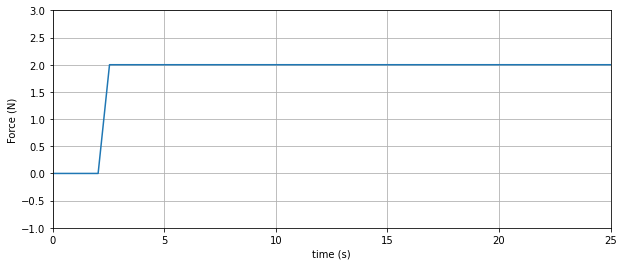

In [63]:
H  = F0*MRPy.Heaviside(NX=1, N=50, t0=2.5, fs=2.)
t  = H.t_axis()

plt.figure(1, figsize=(10, 4), clear=True)
plt.plot(t, H[0])

plt.xlim(0, H.Td);   plt.xlabel('time (s)') 
plt.ylim(-1., 3.);   plt.ylabel('Force (N)') 

plt.grid(True) 

H.printAttrib()


Observe that the number of time steps ```N``` and the total duration ```Td``` will define the 
sampling frequency ```fs``` and the time step will be $\Delta t = 1/f_{\rm s}$.
Smaller values of ```N``` will then worse the integration accuracy for a given ```Td```.

The solution by finite differences is then available through the ```sdof_fdiff``` method:


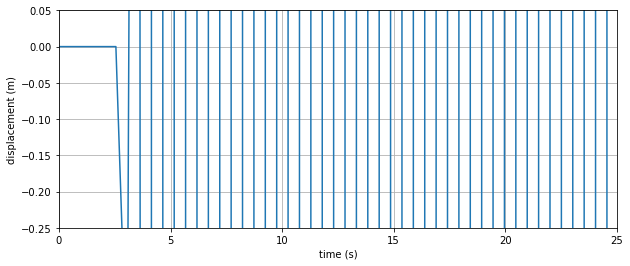

In [64]:
u_FD  = H.sdof_fdiff(fn, zt, u0, v0)/m
t     = u_FD.t_axis()

plt.figure(2, figsize=(10, 4), clear=True)
plt.plot(t, -u_FD[0])

plt.xlim(0., u_FD.Td);   plt.xlabel('time (s)') 
plt.ylim(-0.25, 0.05);   plt.ylabel('displacement (m)') 

plt.grid(True)


It can be clearly observed that, after the step onset, the system will oscillate
with decreasing amplitude around the static response. 
This static displacement can be calculated directly from system stiffness:


In [54]:
k    = m*(2*np.pi*fn)**2      # system stiffness from frequency formula (w^2 = k/m)
u_st = F0/k                   # displacement for maximum applied force (u = F/k)

print('Static displacement = {0:0.3f}m'.format(u_st))

Static displacement = 0.051m


Let us see now what happens whenever the time step is too long in comparison to the system
natural period of vibration. 


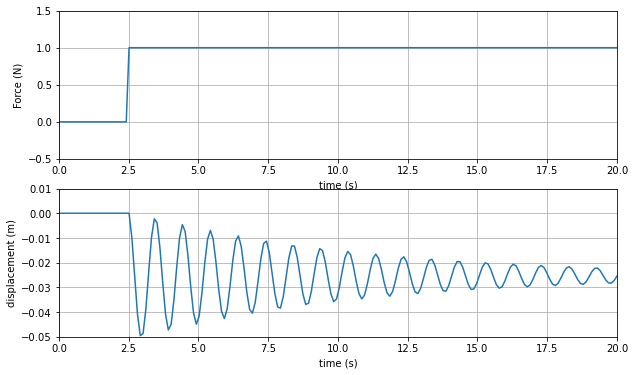

In [7]:
Tn = 1/fn           # natural period in seconds
dt = Tn/10           # very coarse time step (explore this!!!)
N  = int(H.Td/dt)   # new length for the Heaviside's excitation

H2 = MRPy.Heaviside(NX=1, N=N, t0=2.5, Td=20)
u2 = H2.sdof_fdiff(fn, zt, u0, v0)/m
t2 = H2.t_axis()

plt.figure(3, figsize=(10, 6), clear=True)

plt.subplot(2,1,1)
plt.plot(t2, H2[0]);   
plt.xlim(0,  H2.Td);    plt.xlabel('time (s)') 
plt.ylim(-0.5, 1.5);    plt.ylabel('Force (N)') 
plt.grid(True) 

plt.subplot(2,1,2)
plt.plot(t2, -u2[0]);   
plt.xlim( 0.0, u2.Td);    plt.xlabel('time (s)') 
plt.ylim(-0.05, 0.01);    plt.ylabel('displacement (m)') 
plt.grid(True) 


Since we choose $\Delta t < T_{\rm n}$, the solution has diverged!

To make full use of the Jupyter notebook concept, try now changing the fraction of 
$T_{\rm n}$ used to define the time step in the example above. 
What is the worst acceptable accuracy?


## 3. The Duhamel's integral technique <a name="section_3"></a> 


### 3.1. Formulation <a name="section_31"></a> 

The numerical solution by the Duhamel's integral technique is restricted to linear systems.
It relies on the superposition of system responses to a sequence on impulses $F(\tau) \, d\tau$.
It has been seen that the general solution of the equilibrium equation of a sdof system
subjected to a general load $F(t)$ is given by the convolution of this load with the 
impulse response:

$$ u(t) = u_0(t) + \frac{1}{m \omega_{\rm D}} 
                   \int_0^t \exp \left[ -\zeta\omega_{\rm n}(t - \tau) \right] \;
                   \sin \omega_{\rm D} (t - \tau) \; F(\tau) \; d\tau $$

where $u_0(t)$ is the system response to the initial conditions.
Considering now the trigonometric identity:

$$ \sin \omega_{\rm D} (t - \tau) = \sin \omega_{\rm D}t \; \sin \omega_{\rm D}\tau -
                                    \cos \omega_{\rm D}t \; \cos \omega_{\rm D}\tau $$

and disregarding for a moment the initial conditions leads to:

$$ u(t) = \frac{1}{m \omega_{\rm D}} \; \left[
          \frac{A(t)   \sin \omega_{\rm D}t - B(t)   \cos \omega_{\rm D}t}
               {\exp ( -\zeta\omega_{\rm n}t )} \right] $$

with:

\begin{align*}
A(t) &= \int_0^t \exp ( -\zeta\omega_{\rm n}\tau ) \;
        \cos \omega_{\rm D} \tau \; F(\tau) \; d\tau \\
B(t) &= \int_0^t \exp ( -\zeta\omega_{\rm n}\tau ) \;
        \sin \omega_{\rm D} \tau \; F(\tau) \; d\tau
\end{align*}

The reformulations above suggest that a recursive scheme can be used to spare computational
time spent in the calculations of trigonometric functions. 
By using the discretized time $\tau_i = i \Delta \tau$ gives the following discrete evaluations:

\begin{align*}
e_i &= \exp ( -\zeta\omega_{\rm n} \tau_i ) \\
s_i &= \sin \omega_{\rm D} \tau_i  \\
c_i &= \cos \omega_{\rm D} \tau_i  \\
F_i &=  F(\tau_i)
\end{align*}

The functions $A_i = A(t_i)$ and $B_i = B(t_i)$ can be readily calculated as
cumulative summations:

\begin{align*}
A_i &= \Delta \tau \; \sum_{j=0}^i e_j c_j F_j \\
B_i &= \Delta \tau \; \sum_{j=0}^i e_j s_j F_j
\end{align*}

and the solution is finally obtained as:

$$ u_i = u_{0i} + \frac{1}{m \omega_{\rm D} } \left( \frac{A_i s_i - B_i c_i}{e_i} \right)$$

with the response to the initial conditions (displacement $u_0$ and velocity $v_0$) from:

$$ u_{0i} = \frac{1}{e_i} 
            \left[ u_0 c_i + 
            \left( \frac{v_0 + u_0 \zeta \omega_{\rm n}}{\omega_{\rm D}} \right) s_i \right]$$

This is a quite fast computational scheme, for Python can build de time vector and
evaluate de functions through built-in ```numpy``` commands, including the cumulative summation.
Furthermore, the Duhamel technique does not become unstable no matter how coarse the
chosen time step is, although its accuracy may not be ensured in this case.


### 3.2. Example of application with ```MRPy```

The formulation above is also implemented as a method for the  ```MRPy``` class, as exemplified
in the following.
The same system properties and unit step loading from previous example are used.
The class method is:



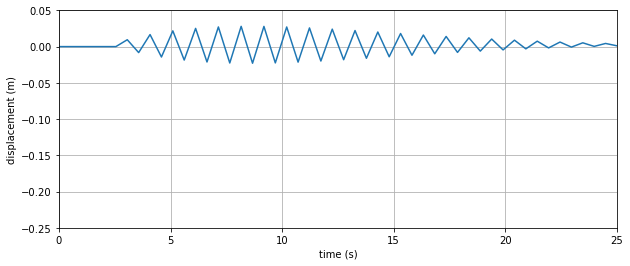

In [67]:
H    = F0*MRPy.Heaviside(NX=1, N= 50, t0=2.5, fs=2.)
#H    = F0*MRPy.Heaviside(NX=1, N=100, t0=2.5, fs=4.)
#H    = F0*MRPy.Heaviside(NX=1, N=200, t0=2.5, fs=8.)
t    = H.t_axis()

u_DH = H.sdof_Duhamel(fn, zt, u0, v0)/m
t    = u_DH.t_axis()

plt.figure(4, figsize=(10, 4), clear=True)
plt.plot(t, -u_DH[0])

plt.xlim(0,  u_DH.Td);      plt.xlabel('time (s)') 
plt.ylim(-0.25, 0.05);      plt.ylabel('displacement (m)') 

plt.grid(True) 


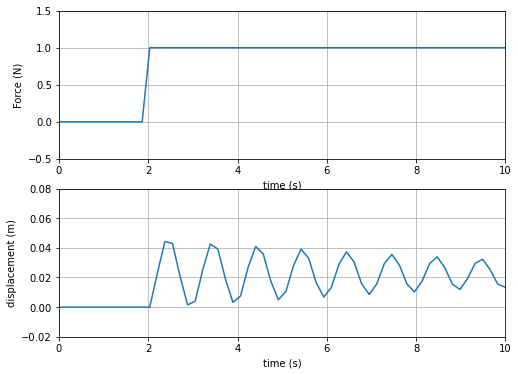

In [9]:
Tn = 1/fn           # natural period in seconds
dt = Tn/3           # very coarse time step on the verge of instability (explore this!!!)
N  = int(H.Td/dt)   # new length for the Heaviside's excitation

H2 = MRPy.Heaviside(NX=1, N=N, t0=2, Td=10)
u2 = H2.sdof_Duhamel(fn, zt, u0, v0)/m
t2 = H2.t_axis()

plt.figure(5, figsize=(8, 6), clear=True)

plt.subplot(2,1,1)
plt.plot(t2, H2[0]);   
plt.xlim(0,  H2.Td);    plt.xlabel('time (s)') 
plt.ylim(-0.5, 1.5);    plt.ylabel('Force (N)') 
plt.grid(True) 

plt.subplot(2,1,2)
plt.plot(t2, -u2[0]);   
plt.xlim(0,   u2.Td);    plt.xlabel('time (s)') 
plt.ylim(-0.02, 0.08);   plt.ylabel('displacement (m)') 
plt.grid(True) 


On the contrary of the diverged solution by finite differences, even by choosing 
$\Delta t < T_{\rm n}$ does not cause the solution to diverge.


## 4. Example: excitation recorded as file <a name="section_4"></a> 



The ```MRPy``` class provides a constructor that reads a time series from file. 
There are some formatting options and others can be included as needed.
In this example we will read a file recorded with the cell phone app ```iNVH``` by Bosch.
The file has a _.csv_ format with four columns, the first being the sampling time and
the next three being the accelerations along the three measurement axes ($x$, $y$ and $z$).

Reading the file is a straighforward calling to the ```from_file``` constructor:


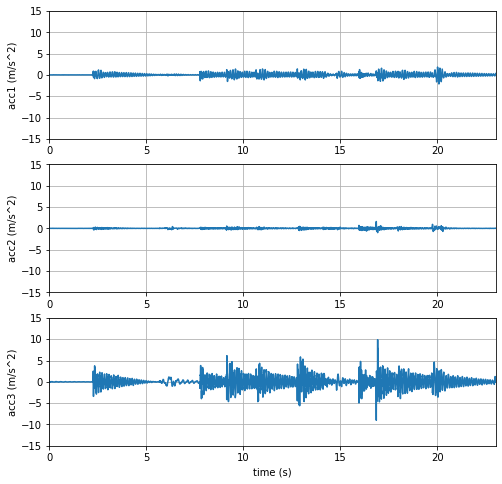

In [79]:
data = MRPy.from_file('resources/data/iNVH001', form='invh').zero_mean()
t    = data.t_axis()

plt.figure(6, figsize=(8, 8), clear=True)

for kX, acc in enumerate(data):
    
    plt.subplot(3, 1 ,kX+1)
    plt.plot(t, acc)

    plt.xlim(0, data.Td);   
    plt.ylim(-15, 15);
    plt.ylabel('acc{0} (m/s^2)'.format(kX+1)) 

    plt.grid(True) 

plt.xlabel('time (s)');


This data was obtained at the center of a metallic beam subjected to multiple impacts.
We are interested in the acceleration along the $z$ axis, so it can be isolated from the 
complete set with:


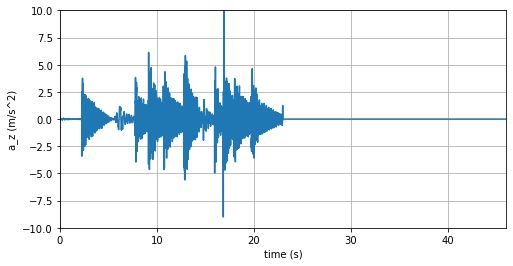

In [80]:
az = MRPy(data[2], data.fs).double()
t  = az.t_axis()

plt.figure(7, figsize=(8, 4), clear=True)
plt.plot(t, az[0])

plt.xlim(0, az.Td);  plt.xlabel('time (s)') 
plt.ylim(-10, 10);   plt.ylabel('a_z (m/s^2)') 

plt.grid(True) 


Now this acceleration will be applied as a basis excitation to a sdof system with
the same properties as defined in the previous sections.
The solutions by finite differences and Duhamel are compared:


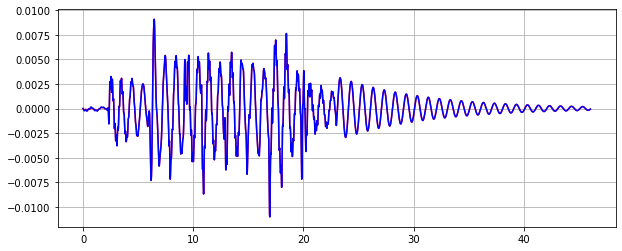

In [81]:
u_FD = az.sdof_fdiff  (fn, zt, u0, v0)
u_DH = az.sdof_Duhamel(fn, zt, u0, v0)

plt.figure(8, figsize=(10, 4), clear=True)
plt.plot(t, u_FD[0], 'r', t, u_DH[0], 'b')

#plt.xlim(0, az.Td);        plt.xlabel('time (s)') 
#plt.ylim(-0.015, 0.015);   plt.ylabel('displacement (m)') 

plt.grid(True) 


It seems that both techniques yield almos the same results, so let us take a look at the error:

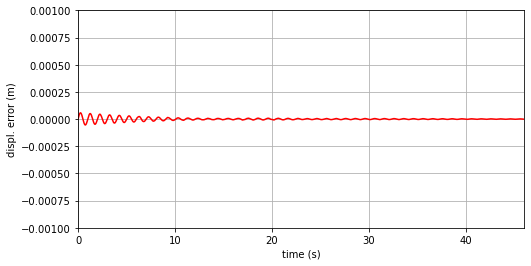

In [72]:
err = u_FD - u_DH

plt.figure(9, figsize=(8, 4), clear=True)
plt.plot(t, err[0], 'r')

plt.xlim(0, az.Td);        plt.xlabel('time (s)') 
plt.ylim(-0.001, 0.001);   plt.ylabel('displ. error (m)') 

plt.grid(True) 


This means that, for the provided sampling rate, the integration error is very small.

## 5. Assignments <a name="section_5"></a> 

1. Utilizar as propriedades (frequência e amortecimento) do trabalho anterior.
2. Utilizar como entrada o registro de aceleração sísmica fornecido abaixo.
3. Calcular a resposta com ``MRPy.sdof_FDiff()`` e ``MRPy.sdof_Duhamel()``.
4. Relatório com descrição do objeto, gráficos e resultados.


 fs = 33.3Hz
 Td = 64.0s

 NX = 1
 N  = 2132
 M  = 1067



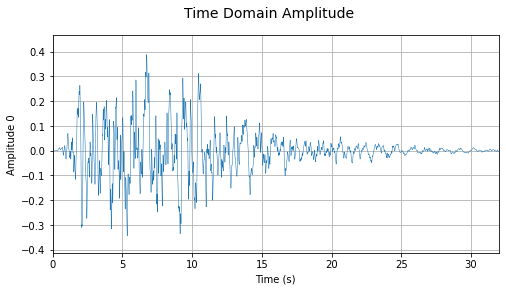

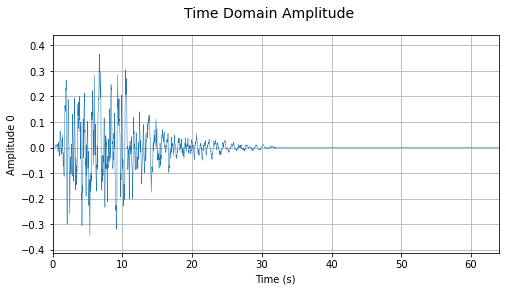

In [15]:
from   scipy.interpolate import interp1d

a    = MRPy.from_file('resources/data/earthquake', form='columns')
func = interp1d(a.t_axis(), a[0])

Td   = a.Td                            # duração do sinal é a mesma
dt   = 0.03                            # passo de tempo proposto
ti   = np.linspace(0, Td, int(Td/dt))  # reduz resolução, aumenta dt
fsi  = len(ti)/Td                      # nova taxa de aquisição
ai   = MRPy(func(ti), fsi)             # aceleração interpolada
ai   = ai.double()

f10  =  a.plot_time(10, figsize=(8,4)) # aceleração original
f11  = ai.plot_time(11, figsize=(8,4)) # resolução alterada

ai.printAttrib()
